In [114]:
# Linear regression best W - 6 problems 
import pandas as pd
file_path = 'modified_spy.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Volume,Adj Close,Return,Short_MA,Long_MA,True_Label,Predict_W2,Predict_W3,Predict_W4,Predict_Ensemble
0,2017-01-03,2017,1,3,Tuesday,1,2017-01,225.04,225.83,223.88,...,91366500,200.63,0.000000,200.6300,200.6300,+,−,−,−,−
1,2017-01-04,2017,1,4,Wednesday,1,2017-01,225.62,226.75,225.61,...,78744400,201.82,0.005950,201.2250,201.2250,+,−,−,−,−
2,2017-01-05,2017,1,5,Thursday,1,2017-01,226.27,226.58,225.48,...,78379000,201.66,-0.000795,201.3700,201.3700,−,−,−,−,−
3,2017-01-06,2017,1,6,Friday,1,2017-01,226.53,227.75,225.90,...,71559900,202.38,0.003578,201.6225,201.6225,+,−,−,−,−
4,2017-01-09,2017,1,9,Monday,2,2017-02,226.91,227.07,226.42,...,46939700,201.72,-0.003301,201.6420,201.6420,−,−,−,−,−


In [115]:
# 1
data['Date'] = pd.to_datetime(data['Date']) # splits data into two years 
data_year1 = data[data['Year'] == 2017]
data_year2 = data[data['Year'] == 2018]
total_trading_days_year1 = data_year1.shape[0] # number of trading days 
total_trading_days_year1

251

In [116]:
#1
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_pl(data, window_size):
    position = None
    entry_price = 0
    pl = []  #tracks pl - profit or loss 
    
    for i in range(window_size, len(data)): # window for linear regression 
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values  # close price 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0]
        actual_price = data.iloc[i]['Adj Close'] # real price 
        
        if predicted_price > actual_price: # trade 
            if position is None:
                position = 'long'
                entry_price = actual_price
            elif position == 'short':
                pl.append(entry_price - actual_price) # profit or loss for short
                position = None
        elif predicted_price < actual_price:
            if position is None:
                position = 'short'
                entry_price = actual_price
            elif position == 'long':
                pl.append(actual_price - entry_price)  # profit or loss for long 
                position = None 
    #average pl 
    average_pl = np.mean(pl) if pl else 0  
    return average_pl
calculate_pl(data_year1, 5)

0.26376623376623415

In [117]:
#1
window_sizes = range(5, 31) # pl for w 5, 6 and etc
average_pl_per_trade = [calculate_pl(data_year1, w) for w in window_sizes]
pl_df = pd.DataFrame({
    'Window Size': window_sizes,
    'Average P/L per Trade': average_pl_per_trade})
optimal_w = pl_df.loc[pl_df['Average P/L per Trade'].idxmax(), 'Window Size'] # best window 
optimal_w, pl_df

(15,
     Window Size  Average P/L per Trade
 0             5               0.263766
 1             6               0.293521
 2             7               0.314308
 3             8               0.302167
 4             9               0.260179
 5            10               0.137600
 6            11               0.220638
 7            12               0.122979
 8            13               0.462708
 9            14               0.400667
 10           15               0.464545
 11           16               0.393902
 12           17               0.125946
 13           18               0.032286
 14           19              -0.006364
 15           20               0.053143
 16           21              -0.011212
 17           22              -0.179677
 18           23              -0.367857
 19           24              -0.347500
 20           25              -0.425769
 21           26              -0.456800
 22           27              -0.291200
 23           28              -0.19

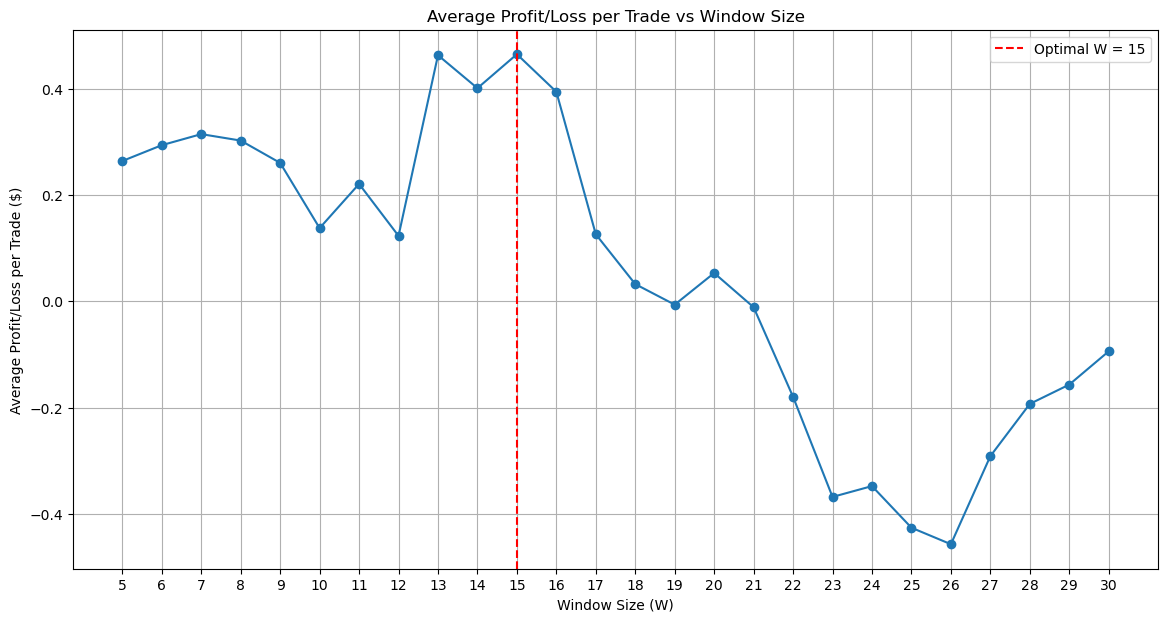

In [118]:
# 1 Plot 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7)) # Plot avearage pl for w 
plt.plot(pl_df['Window Size'], pl_df['Average P/L per Trade'], marker='o')
plt.title('Average Profit/Loss per Trade vs Window Size')
plt.xlabel('Window Size (W)')
plt.ylabel('Average Profit/Loss per Trade ($)')
plt.grid(True)
plt.xticks(window_sizes)
plt.axvline(x=optimal_w, color='r', linestyle='--', label=f'Optimal W = {optimal_w}')
plt.legend()
plt.show()

In [119]:
#2 
from sklearn.metrics import r2_score
def calculate_r2(data, window_size):
    r2_scores = []

    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0]
        actual_price = data.iloc[i]['Adj Close']
        r2 = r2_score([actual_price], [predicted_price]) # calculates r^2 
        r2_scores.append(r2)
    
    return r2_scores

r2_scores_year2 = calculate_r2(data_year2, optimal_w)
average_r2_year2 = np.mean(r2_scores_year2)
data_year2_with_r2 = data_year2.iloc[optimal_w:].copy()
data_year2_with_r2['r2'] = r2_scores_year2
average_r2_year2, data_year2_with_r2.head()

/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metri

(nan,
           Date  Year  Month  Day    Weekday  Week_Number Year_Week    Open  \
 266 2018-01-24  2018      1   24  Wednesday            3   2018-03  284.02   
 267 2018-01-25  2018      1   25   Thursday            3   2018-03  284.16   
 268 2018-01-26  2018      1   26     Friday            3   2018-03  284.25   
 269 2018-01-29  2018      1   29     Monday            4   2018-04  285.93   
 270 2018-01-30  2018      1   30    Tuesday            4   2018-04  282.60   
 
        High     Low  ...  Adj Close    Return    Short_MA   Long_MA  \
 266  284.70  281.84  ...     257.14 -0.000388  252.110714  242.5204   
 267  284.27  282.40  ...     257.25  0.000424  252.868571  243.0020   
 268  286.63  283.96  ...     260.23  0.011578  253.722143  243.5390   
 269  286.43  284.50  ...     258.50 -0.006630  254.420000  244.0522   
 270  284.74  281.22  ...     255.85 -0.010257  254.887857  244.5356   
 
      True_Label  Predict_W2 Predict_W3 Predict_W4 Predict_Ensemble  r2  
 266      

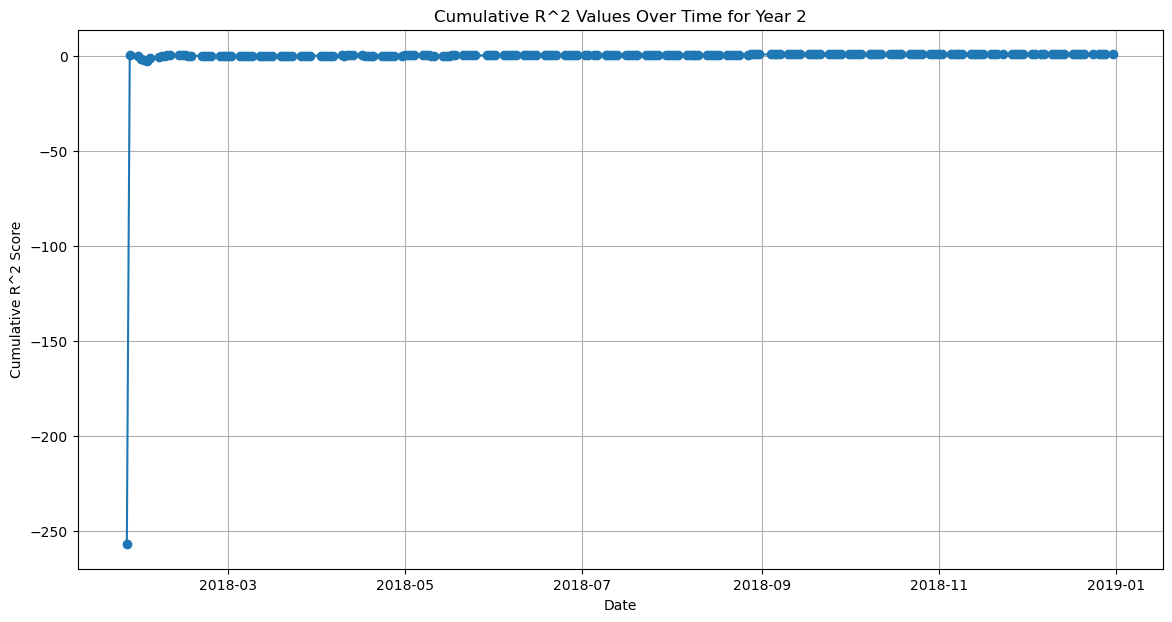

-0.7339016433725922

In [120]:
# 2
def calculate_cumulative_r2(data, window_size):
    predictions = []
    actuals = []
    cumulative_r2_scores = []
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values  # changed close price
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0] # predicts the price 
        predictions.append(predicted_price)
        actuals.append(data.iloc[i]['Adj Close'])
        
        if i > window_size:
            cumulative_r2_scores.append(r2_score(actuals, predictions))
        else:
            cumulative_r2_scores.append(None)
    return cumulative_r2_scores

cumulative_r2_scores_year2 = calculate_cumulative_r2(data_year2, optimal_w)
data_year2_with_cumulative_r2 = data_year2.iloc[optimal_w:].copy()
data_year2_with_cumulative_r2['cumulative_r2'] = cumulative_r2_scores_year2
average_cumulative_r2_year2 = np.nanmean(data_year2_with_cumulative_r2['cumulative_r2'])
plt.figure(figsize=(14, 7))
plt.plot(data_year2_with_cumulative_r2['Date'], data_year2_with_cumulative_r2['cumulative_r2'], marker='o')
plt.title('Cumulative R^2 Values Over Time for Year 2')
plt.xlabel('Date')
plt.ylabel('Cumulative R^2 Score')
plt.grid(True)
plt.show()
average_cumulative_r2_year2

In [121]:
#3 
def trading_strategy(data, window_size):
    num_long_positions = 0
    num_short_positions = 0
    position = None
    entry_price = 0
    pl = []  # pl for each trade 
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1) 
        y = window_data['Adj Close'].values # real price 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0] # next days price prediction 
        actual_price = data.iloc[i]['Adj Close']
        
        if predicted_price > actual_price:
            if position == None:
                position = 'long' # take long if we arent in yet 
                entry_price = actual_price
                num_long_positions += 1
            elif position == 'short':
                pl.append(entry_price - actual_price)  # pl for short
                position = None  # after closing day no position 
        elif predicted_price < actual_price:
            if position == None:
                position = 'short'
                entry_price = actual_price
                num_short_positions += 1
            elif position == 'long':
                pl.append(actual_price - entry_price) 
                position = None
    
    average_pl = np.mean(pl) if pl else 0 # pl per trade average 
    
    return num_long_positions, num_short_positions, average_pl

num_long_positions_year2, num_short_positions_year2, average_pl_year2 = trading_strategy(data_year2, optimal_w)
num_long_positions_year2, num_short_positions_year2, average_pl_year2

(16, 16, -1.9983870967741932)

In [122]:
#4 
def trading_strategy_pl(data, window_size):
    num_long_positions = 0
    num_short_positions = 0
    pl_long = []  # pl for long 
    pl_short = []  # pl for short 
    position = None  # None, 'long', 'short'
    entry_price = 0
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1) 
        y = window_data['Adj Close'].values
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0]
        actual_price = data.iloc[i]['Adj Close']  # real closing price 
        
        if predicted_price > actual_price: # trading strategy 
            if position == None:
                position = 'long'
                entry_price = actual_price
                num_long_positions += 1
            elif position == 'short':
                pl_short.append(entry_price - actual_price)  # pl for short
                position = None 
        elif predicted_price < actual_price:
            if position == None:
                position = 'short'
                entry_price = actual_price
                num_short_positions += 1
            elif position == 'long':
                pl_long.append(actual_price - entry_price)  # pl for long 
                position = None
    
    average_pl_long = np.mean(pl_long) if pl_long else 0 
    average_pl_short = np.mean(pl_short) if pl_short else 0
    return num_long_positions, num_short_positions, average_pl_long, average_pl_short

num_long_positions_year2, num_short_positions_year2, average_pl_long_year2, average_pl_short_year2 = trading_strategy_pl(data_year2, optimal_w)
(num_long_positions_year2, num_short_positions_year2, average_pl_long_year2, average_pl_short_year2)

(16, 16, -2.9287499999999955, -1.006000000000004)

In [123]:
# 5, 6 
def trading_strategy_dur(data, window_size):
    num_long_positions = 0
    num_short_positions = 0
    long_positions_duration = []
    short_positions_duration = []
    position = None
    entry_day = None
    pl = []  # pl for trades 
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values # changed price 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0] # next day's price (closing) 
        actual_price = data.iloc[i]['Adj Close']
        
        if predicted_price > actual_price:
            if position == None:
                position = 'long'
                entry_day = i
                num_long_positions += 1
            elif position == 'short':
                pl.append(entry_price - actual_price)  # pl for short
                short_positions_duration.append(i - entry_day)
                position = None
        elif predicted_price < actual_price:
            if position == None:
                position = 'short'
                entry_day = i
                num_short_positions += 1
            elif position == 'long':
                pl.append(actual_price - entry_price)  # pl for long
                long_positions_duration.append(i - entry_day)
                position = None
        entry_price = actual_price
    
    average_pl = np.mean(pl) if pl else 0 # average pl 
    average_long_duration = np.mean(long_positions_duration) if long_positions_duration else 0
    average_short_duration = np.mean(short_positions_duration) if short_positions_duration else 0
    
    return (num_long_positions, num_short_positions, average_pl,
            average_long_duration, average_short_duration)

results_year1 = trading_strategy_dur(data_year1, optimal_w)
results_year1

(26, 19, 1.083636363636363, 4.04, 4.473684210526316)

In [124]:
# Trading with Linear Models 
#1 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

data_path = 'modified_spy.csv'
data = pd.read_csv(data_path)

data['Date'] = pd.to_datetime(data['Date']) # convert and sort data 
data = data.sort_values('Date')
start_date = data['Date'].min() # filters data for the first year 
end_date = start_date + pd.DateOffset(years=1)
data_year1 = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]
data_year1.set_index('Date', inplace=True) # daily to weekly 
weekly_data_year1 = data_year1['Adj Close'].resample('W').last().dropna()

def prepare_data_for_poly(weekly_data, window_size):
    X = []
    y = []
    for i in range(len(weekly_data) - window_size):
        X.append(list(range(i, i + window_size)))
        y.append(weekly_data.iloc[i + window_size])
    return np.array(X), np.array(y)

degree = 1 
window_size = 5 

X, y = prepare_data_for_poly(weekly_data_year1, window_size)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # polynomial model 
model.fit(X, y)  # uses points which are available 
predicted_prices = model.predict(X) # predicts labels 
predicted_labels = ['green' if pred > actual else 'red' for pred, actual in zip(predicted_prices, weekly_data_year1.iloc[window_size:])]
actual_labels = ['green' if price > weekly_data_year1.iloc[i] else 'red' for i, price in enumerate(weekly_data_year1.iloc[window_size:])]

accuracy_all = accuracy_score(actual_labels, predicted_labels) # calculates accuracy 
accuracy_all, actual_labels, predicted_labels

(0.375,
 ['green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'green',
  'red',
  'red',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'red',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green'],
 ['red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'red',
  'green',
  'green',
  'red',
  'red',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'red',
  'red',
  'green',
  'green',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'r

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

def prepare_data_for_poly(weekly_data, window_size):
    X = []
    y = []
    for i in range(len(weekly_data) - window_size):
        X.append(list(range(i, i + window_size))) 
        y.append(weekly_data.iloc[i + window_size])  # next weeks price is used 
    return np.array(X), np.array(y)

def calculate_accuracy_degree(weekly_data, degree, window_size):
    X, y = prepare_data_for_poly(weekly_data, window_size)
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    predicted_prices = model.predict(X) # predicts the price 
    predicted_labels = ['green' if predicted_prices[i] > weekly_data.iloc[i + window_size - 1] else 'red' # labels 
                        for i in range(len(predicted_prices))]
    actual_labels = ['green' if weekly_data.iloc[i + window_size] > weekly_data.iloc[i + window_size - 1] else 'red' 
                     for i in range(len(weekly_data) - window_size)]
    
    return accuracy_score(actual_labels, predicted_labels) # finds accuracy 

accuracy_results = {1: [], 2: [], 3: []}

for degree in range(1, 4):
    for window_size in range(5, 13):  # w with 5,6 and etc 
        accuracy = calculate_accuracy_degree(weekly_data_year1, degree, window_size)
        accuracy_results[degree].append((window_size, accuracy))

accuracy_results

{1: [(5, 0.625),
  (6, 0.6170212765957447),
  (7, 0.6521739130434783),
  (8, 0.6666666666666666),
  (9, 0.6136363636363636),
  (10, 0.6046511627906976),
  (11, 0.6190476190476191),
  (12, 0.6341463414634146)],
 2: [(5, 0.625),
  (6, 0.6170212765957447),
  (7, 0.6086956521739131),
  (8, 0.6),
  (9, 0.6136363636363636),
  (10, 0.6046511627906976),
  (11, 0.6190476190476191),
  (12, 0.6585365853658537)],
 3: [(5, 0.5416666666666666),
  (6, 0.574468085106383),
  (7, 0.5652173913043478),
  (8, 0.5777777777777777),
  (9, 0.6136363636363636),
  (10, 0.6046511627906976),
  (11, 0.5952380952380952),
  (12, 0.5365853658536586)]}

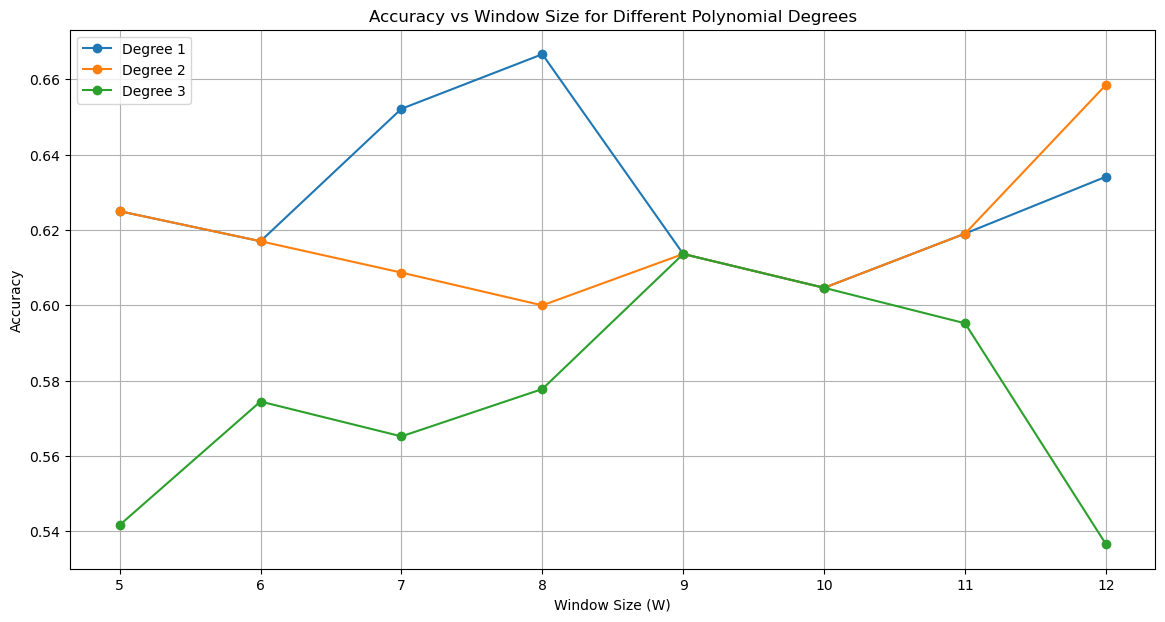

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for degree, results in accuracy_results.items():
    window_sizes = [result[0] for result in results] # w size and accuracy 
    accuracies = [result[1] for result in results]
    plt.plot(window_sizes, accuracies, marker='o', label=f'Degree {degree}')

plt.title('Accuracy vs Window Size for Different Polynomial Degrees')
plt.xlabel('Window Size (W)')
plt.ylabel('Accuracy')
plt.xticks(range(5, 13)) # window sizes 
plt.legend()
plt.grid(True)
plt.show()

In [127]:
#2 
start_date_year2 = end_date
end_date_year2 = start_date_year2 + pd.DateOffset(years=1)

data_year2 = data[(data['Date'] >= start_date_year2) & (data['Date'] < end_date_year2)]
data_year2.set_index('Date', inplace=True)
weekly_data_year2 = data_year2['Adj Close'].resample('W').last().dropna()

best_window_sizes = {degree: max(results, key=lambda x: x[1])[0] for degree, results in accuracy_results.items()}
accuracy_results_year2 = {} # accuracy for year 2 

for degree, window_size in best_window_sizes.items():
    X_year1, y_year1 = prepare_data_for_poly(weekly_data_year1, window_size)
    X_year2, y_year2 = prepare_data_for_poly(weekly_data_year2, window_size)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_year1, y_year1)
    predicted_prices_year2 = model.predict(X_year2) # predicts labels for year 2 
    predicted_labels_year2 = ['green' if pred > weekly_data_year2.iloc[i + window_size - 1] else 'red' 
                              for i, pred in enumerate(predicted_prices_year2)]
    actual_labels_year2 = ['green' if weekly_data_year2.iloc[i + window_size] > weekly_data_year2.iloc[i + window_size - 1] else 'red' # real labels 
                           for i in range(len(weekly_data_year2) - window_size)]
    
    accuracy_year2 = accuracy_score(actual_labels_year2, predicted_labels_year2) # accuracy for year 2 
    accuracy_results_year2[degree] = accuracy_year2
best_window_sizes, accuracy_results_year2

({1: 8, 2: 12, 3: 9},
 {1: 0.4888888888888889, 2: 0.43902439024390244, 3: 0.45454545454545453})

In [128]:
#3 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

confusion_matrices_year2 = {} # transform data for both years 
transformed_year1_data = {}
transformed_year2_data = {}
models = {}
accuracy_scores_year2 = {}

for degree, window_size in best_window_sizes.items(): # processed data for each degree 
    poly_features = PolynomialFeatures(degree)
    X_year1, y_year1 = prepare_data_for_poly(weekly_data_year1, window_size)
    X_year2, y_year2 = prepare_data_for_poly(weekly_data_year2, window_size)
    X_year1_transformed = poly_features.fit_transform(X_year1)
    transformed_year1_data[degree] = X_year1_transformed
    X_year2_transformed = poly_features.transform(X_year2)
    transformed_year2_data[degree] = X_year2_transformed
    model = LinearRegression() # uses polynomial model 
    model.fit(X_year1_transformed, y_year1)
    models[degree] = model
    
    predicted_prices_year2 = model.predict(X_year2_transformed)
    predicted_labels_year2 = ['green' if pred > weekly_data_year2.iloc[i + window_size - 1] else 'red' 
                              for i, pred in enumerate(predicted_prices_year2)]
    actual_labels_year2 = ['green' if weekly_data_year2.iloc[i + window_size] > weekly_data_year2.iloc[i + window_size - 1] else 'red' 
                           for i in range(len(weekly_data_year2) - window_size)]
    matrix = confusion_matrix(actual_labels_year2, predicted_labels_year2, labels=["green", "red"])
    confusion_matrices_year2[degree] = matrix
confusion_matrices_year2

{1: array([[ 2, 23],
        [ 0, 20]]),
 2: array([[ 2, 22],
        [ 1, 16]]),
 3: array([[ 2, 23],
        [ 1, 18]])}

In [129]:
#4 
trading_strategies_results_year2 = {}
for degree, window_size in best_window_sizes.items():
    X_year2, y_year2 = prepare_data_for_poly(weekly_data_year2, window_size) # data year 2 
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_year2, y_year2)
    predicted_prices_year2 = model.predict(X_year2) # predict labels for year 2 
    predicted_labels_year2 = ['green' if pred > actual else 'red' for pred, actual in zip(predicted_prices_year2, weekly_data_year2.iloc[window_size:])]

    # Initialize trading variables
    starting_cash = 10000  # initializes
    cash = starting_cash 
    shares_owned = 0  # shares
    
    for i in range(len(predicted_labels_year2)):
        if predicted_labels_year2[i] == 'green': # buy if green
            if cash > 0:
                buy_price = weekly_data_year2.iloc[i + window_size - 1] 
                shares_bought = cash / buy_price
                shares_owned += shares_bought
                cash -= shares_bought * buy_price
                
        sell_price = weekly_data_year2.iloc[i + window_size]
        cash += shares_owned * sell_price
        shares_owned = 0
    final_value = cash
    profit = final_value - starting_cash
    trading_strategies_results_year2[degree] = {'Final Value': final_value,'Profit': profit,'Return': profit / starting_cash * 100}
trading_strategies_results_year2

{1: {'Final Value': 8338.827978389965,
  'Profit': -1661.1720216100348,
  'Return': -16.61172021610035},
 2: {'Final Value': 9040.714516110918,
  'Profit': -959.2854838890817,
  'Return': -9.592854838890817},
 3: {'Final Value': 8331.560525745143,
  'Profit': -1668.4394742548575,
  'Return': -16.684394742548577}}

In [130]:
# F test
from scipy.stats import f as fisher_f
#1 
def perform_f(data_month): # f test for a month 
    n = len(data_month)
    x = np.arange(n).reshape(-1, 1) # day as a predictor 
    y = data_month['Adj Close'].values
    model = LinearRegression().fit(x, y)
    predictions = model.predict(x)
    residuals = y - predictions
    SSE_full = np.sum(residuals**2)

    best_split = None # tracks the best split 
    min_SSE_split = float('inf')

    for k in range(1, n - 1):
        x1, y1 = x[:k], y[:k] # splits dataset 
        x2, y2 = x[k:], y[k:]
        model1 = LinearRegression().fit(x1, y1)
        model2 = LinearRegression().fit(x2, y2)
        predictions1 = model1.predict(x1)
        predictions2 = model2.predict(x2)
        residuals1 = y1 - predictions1
        residuals2 = y2 - predictions2
        SSE_split = np.sum(residuals1**2) + np.sum(residuals2**2)
        
        if SSE_split < min_SSE_split:
            min_SSE_split = SSE_split
            best_split = k

    numerator = (SSE_full - min_SSE_split) / 2  # calculates F 
    denominator = min_SSE_split / (n - 4)
    F_statistic = numerator / denominator
    p_value = 1 - fisher_f.cdf(F_statistic, 2, n - 4) # calculates P 
    is_significant = p_value < 0.1 # checks if value is significant 

    return best_split, F_statistic, p_value, is_significant

results = []

for year in [1, 2]:
    year_data = data[data['Year'] == data['Year'].min() + (year - 1)]
    for month in range(1, 13):
        data_month = year_data[year_data['Date'].dt.month == month]
        if not data_month.empty:
            best_split, F_statistic, p_value, is_significant = perform_f(data_month)
            results.append({'year': year_data['Year'].min(),'month': month,'best_split': best_split,'F_statistic': F_statistic,'p_value': p_value,'is_significant': is_significant})

results_df = pd.DataFrame(results)
results_df

,year,month,best_split,F_statistic,p_value,is_significant
0,2017,1,15,16.494331,1.294778e-04,True
1,2017,2,8,10.708210,1.291086e-03,True
2,2017,3,14,12.338235,3.679661e-04,True
3,2017,4,14,25.587546,1.463778e-05,True
4,2017,5,12,33.912789,7.850584e-07,True
5,2017,6,12,6.656024,6.855658e-03,True
6,2017,7,11,8.770937,2.680781e-03,True
7,2017,8,12,12.277012,3.779119e-04,True
8,2017,9,5,18.316766,7.292220e-05,True
9,2017,10,17,4.730709,2.233294e-02,True


In [131]:
# 2 and 3 

significant_changes_by_year = results_df.groupby('year')['is_significant'].sum() # changes during the year 

total_significant_changes = significant_changes_by_year.sum() # months with changes 
more_changes_year = significant_changes_by_year.idxmax() # checks which year had more changes 
significant_changes_by_year, total_significant_changes, more_changes_year

(year
 2017    12
 2018    12
 Name: is_significant, dtype: int64,
 24,
 2017)

In [132]:
# Linear regression best W - 6 problems 
import pandas as pd
file_path = 'modified_tmus.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Volume,Adj Close,Return,Short_MA,Long_MA,True_Label,Predict_W2,Predict_W3,Predict_W4,Predict_Ensemble
0,2017-01-03,2017,1,3,Tuesday,1,2017-01,58.10,58.91,57.75,...,3004100,58.32,0.000000,58.320,58.320,+,−,−,−,−
1,2017-01-04,2017,1,4,Wednesday,1,2017-01,58.36,59.46,58.04,...,5540600,58.82,0.008573,58.570,58.570,+,−,−,−,−
2,2017-01-05,2017,1,5,Thursday,1,2017-01,58.77,59.42,57.08,...,5427200,57.61,-0.020571,58.250,58.250,−,−,−,−,−
3,2017-01-06,2017,1,6,Friday,1,2017-01,57.87,58.14,56.64,...,4776100,56.77,-0.014581,57.880,57.880,−,−,−,−,−
4,2017-01-09,2017,1,9,Monday,2,2017-02,56.57,56.99,56.27,...,3329700,56.67,-0.001762,57.638,57.638,−,−,−,−,−


In [133]:
# 1
data['Date'] = pd.to_datetime(data['Date']) # splits data into two years 
data_year1 = data[data['Year'] == 2017]
data_year2 = data[data['Year'] == 2018]
total_trading_days_year1 = data_year1.shape[0] # number of trading days 
total_trading_days_year1

251

In [134]:
#1
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_pl(data, window_size):
    position = None
    entry_price = 0
    pl = []  #tracks profit or loss 
    
    for i in range(window_size, len(data)): # window for linear regression 
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values  # close price 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0]
        actual_price = data.iloc[i]['Adj Close'] # real price 
        
        if predicted_price > actual_price: # trade 
            if position is None:
                position = 'long'
                entry_price = actual_price
            elif position == 'short':
                pl.append(entry_price - actual_price) # profit or loss for short
                position = None
        elif predicted_price < actual_price:
            if position is None:
                position = 'short'
                entry_price = actual_price
            elif position == 'long':
                pl.append(actual_price - entry_price)  # profit or loss for long 
                position = None 
    #average pl 
    average_pl = np.mean(pl) if pl else 0  # Avoid division by zero if pl is empty
    return average_pl
calculate_pl(data_year1, 5)

0.3304878048780487

In [135]:
#1
window_sizes = range(5, 31) # pl for w 5, 6 and etc
average_pl_per_trade = [calculate_pl(data_year1, w) for w in window_sizes]
pl_df = pd.DataFrame({
    'Window Size': window_sizes,
    'Average P/L per Trade': average_pl_per_trade})
optimal_w = pl_df.loc[pl_df['Average P/L per Trade'].idxmax(), 'Window Size'] # best window 
optimal_w, pl_df

(28,
     Window Size  Average P/L per Trade
 0             5               0.330488
 1             6               0.293333
 2             7               0.270781
 3             8               0.226885
 4             9               0.200351
 5            10               0.181250
 6            11               0.089184
 7            12               0.130638
 8            13               0.135333
 9            14               0.074524
 10           15               0.173333
 11           16               0.277692
 12           17               0.303784
 13           18               0.290278
 14           19               0.295946
 15           20               0.337778
 16           21               0.310278
 17           22               0.379706
 18           23               0.281667
 19           24               0.342812
 20           25               0.347778
 21           26               0.391429
 22           27               0.358065
 23           28               0.43

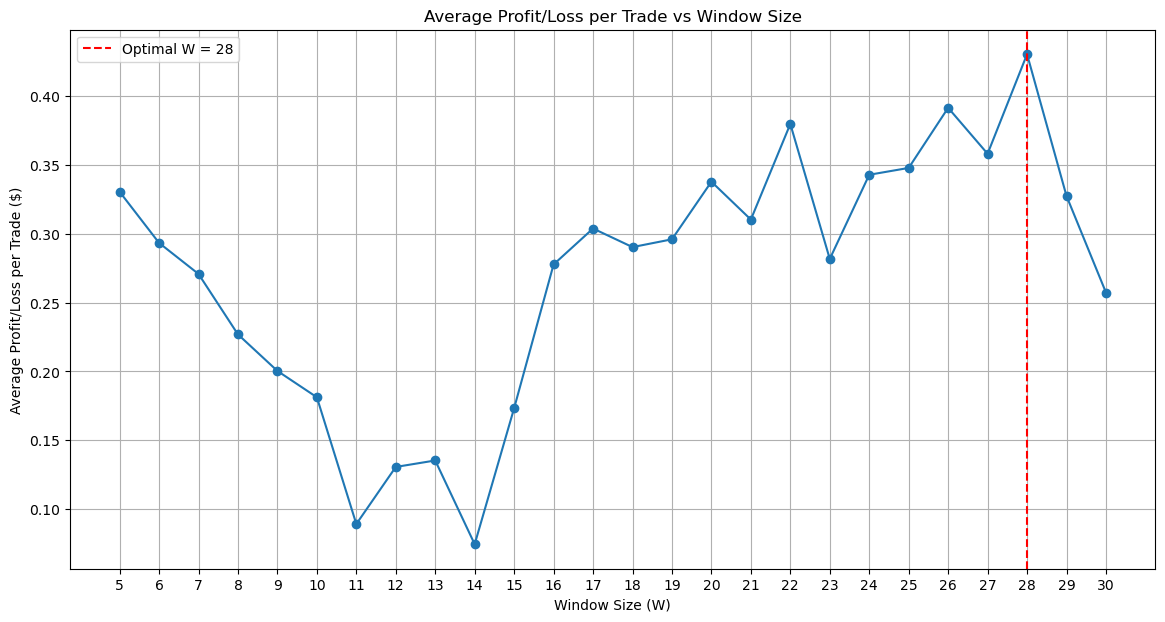

In [136]:
# 1 Plot 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7)) # Plot avearage pl for w 
plt.plot(pl_df['Window Size'], pl_df['Average P/L per Trade'], marker='o')
plt.title('Average Profit/Loss per Trade vs Window Size')
plt.xlabel('Window Size (W)')
plt.ylabel('Average Profit/Loss per Trade ($)')
plt.grid(True)
plt.xticks(window_sizes)
plt.axvline(x=optimal_w, color='r', linestyle='--', label=f'Optimal W = {optimal_w}')
plt.legend()
plt.show()

In [137]:
#2 
from sklearn.metrics import r2_score
def calculate_r2(data, window_size):
    r2_scores = []

    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0]
        actual_price = data.iloc[i]['Adj Close']
        r2 = r2_score([actual_price], [predicted_price]) # calculates r^2 
        r2_scores.append(r2)
    
    return r2_scores

r2_scores_year2 = calculate_r2(data_year2, optimal_w)
average_r2_year2 = np.mean(r2_scores_year2)
data_year2_with_r2 = data_year2.iloc[optimal_w:].copy()
data_year2_with_r2['r2'] = r2_scores_year2
average_r2_year2, data_year2_with_r2.head()

/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/abulkhairturmakhanov/anaconda3/lib/python3.11/site-packages/sklearn/metri

(nan,
           Date  Year  Month  Day    Weekday  Week_Number Year_Week   Open  \
 279 2018-02-12  2018      2   12     Monday            6   2018-06  59.66   
 280 2018-02-13  2018      2   13    Tuesday            6   2018-06  57.68   
 281 2018-02-14  2018      2   14  Wednesday            6   2018-06  57.35   
 282 2018-02-15  2018      2   15   Thursday            6   2018-06  59.32   
 283 2018-02-16  2018      2   16     Friday            6   2018-06  60.63   
 
       High    Low  ...  Adj Close    Return   Short_MA  Long_MA  True_Label  \
 279  60.06  58.07  ...      58.12 -0.018243  62.654286  63.0914           −   
 280  58.28  57.22  ...      57.69 -0.007398  62.132143  63.0238           −   
 281  58.80  57.06  ...      58.62  0.016121  61.720000  62.9782           +   
 282  60.61  58.19  ...      60.44  0.031047  61.374286  62.9822           +   
 283  60.87  59.79  ...      60.06 -0.006287  61.050000  62.9642           −   
 
      Predict_W2 Predict_W3 Predict_W4 Pre

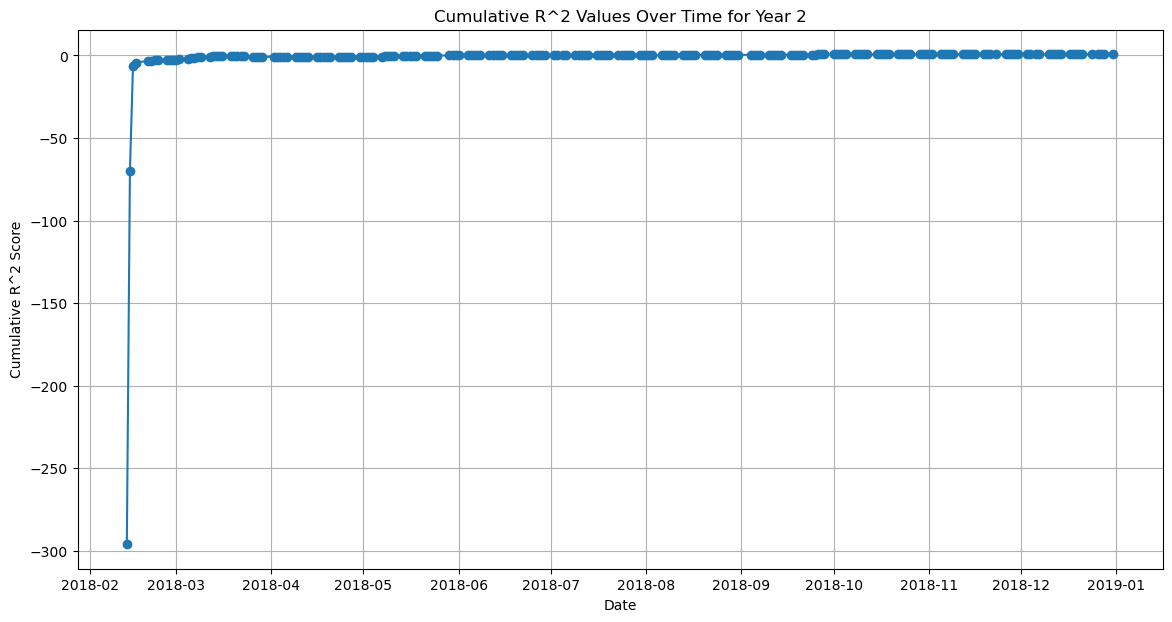

-1.734693065768181

In [138]:
# 2
def calculate_cumulative_r2(data, window_size):
    predictions = []
    actuals = []
    cumulative_r2_scores = []
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values  # changed close price
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0] # predicts the price 
        predictions.append(predicted_price)
        actuals.append(data.iloc[i]['Adj Close'])
        
        if i > window_size:
            cumulative_r2_scores.append(r2_score(actuals, predictions))
        else:
            cumulative_r2_scores.append(None)
    return cumulative_r2_scores

cumulative_r2_scores_year2 = calculate_cumulative_r2(data_year2, optimal_w)
data_year2_with_cumulative_r2 = data_year2.iloc[optimal_w:].copy()
data_year2_with_cumulative_r2['cumulative_r2'] = cumulative_r2_scores_year2
average_cumulative_r2_year2 = np.nanmean(data_year2_with_cumulative_r2['cumulative_r2'])
plt.figure(figsize=(14, 7))
plt.plot(data_year2_with_cumulative_r2['Date'], data_year2_with_cumulative_r2['cumulative_r2'], marker='o')
plt.title('Cumulative R^2 Values Over Time for Year 2')
plt.xlabel('Date')
plt.ylabel('Cumulative R^2 Score')
plt.grid(True)
plt.show()
average_cumulative_r2_year2

In [139]:
#3 
def trading_strategy(data, window_size):
    num_long_positions = 0
    num_short_positions = 0
    position = None
    entry_price = 0
    pl = []  # pl for each trade 
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1) 
        y = window_data['Adj Close'].values # real price 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0] # next days price prediction 
        actual_price = data.iloc[i]['Adj Close']
        
        if predicted_price > actual_price:
            if position == None:
                position = 'long' # take long if we arent in yet 
                entry_price = actual_price
                num_long_positions += 1
            elif position == 'short':
                pl.append(entry_price - actual_price)  # pl for short
                position = None  # after closing day no position 
        elif predicted_price < actual_price:
            if position == None:
                position = 'short'
                entry_price = actual_price
                num_short_positions += 1
            elif position == 'long':
                pl.append(actual_price - entry_price) 
                position = None
    
    average_pl = np.mean(pl) if pl else 0 # pl per trade average 
    
    return num_long_positions, num_short_positions, average_pl

num_long_positions_year2, num_short_positions_year2, average_pl_year2 = trading_strategy(data_year2, optimal_w)
num_long_positions_year2, num_short_positions_year2, average_pl_year2

(13, 15, 0.20592592592592732)

In [140]:
#4 
def trading_strategy_pl(data, window_size):
    num_long_positions = 0
    num_short_positions = 0
    pl_long = []  # pl for long 
    pl_short = []  # pl for short 
    position = None  # None, 'long', 'short'
    entry_price = 0
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1) 
        y = window_data['Adj Close'].values
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0]
        actual_price = data.iloc[i]['Adj Close']  # real closing price 
        
        if predicted_price > actual_price: # trading strategy 
            if position == None:
                position = 'long'
                entry_price = actual_price
                num_long_positions += 1
            elif position == 'short':
                pl_short.append(entry_price - actual_price)  # pl for short
                position = None 
        elif predicted_price < actual_price:
            if position == None:
                position = 'short'
                entry_price = actual_price
                num_short_positions += 1
            elif position == 'long':
                pl_long.append(actual_price - entry_price)  # pl for long 
                position = None
    
    average_pl_long = np.mean(pl_long) if pl_long else 0 
    average_pl_short = np.mean(pl_short) if pl_short else 0
    return num_long_positions, num_short_positions, average_pl_long, average_pl_short

num_long_positions_year2, num_short_positions_year2, average_pl_long_year2, average_pl_short_year2 = trading_strategy_pl(data_year2, optimal_w)
(num_long_positions_year2, num_short_positions_year2, average_pl_long_year2, average_pl_short_year2)

(13, 15, 0.5030769230769241, -0.06999999999999826)

In [141]:
# 5, 6 
def trading_strategy_dur(data, window_size):
    num_long_positions = 0
    num_short_positions = 0
    long_positions_duration = []
    short_positions_duration = []
    position = None
    entry_day = None
    pl = []  # pl for trades 
    
    for i in range(window_size, len(data)):
        window_data = data.iloc[i-window_size:i]
        x = np.arange(window_size).reshape(-1, 1)
        y = window_data['Adj Close'].values # changed price 
        model = LinearRegression().fit(x, y)
        predicted_price = model.predict([[window_size]])[0] # next day's price (closing) 
        actual_price = data.iloc[i]['Adj Close']
        
        if predicted_price > actual_price:
            if position == None:
                position = 'long'
                entry_day = i
                num_long_positions += 1
            elif position == 'short':
                pl.append(entry_price - actual_price)  # pl for short
                short_positions_duration.append(i - entry_day)
                position = None
        elif predicted_price < actual_price:
            if position == None:
                position = 'short'
                entry_day = i
                num_short_positions += 1
            elif position == 'long':
                pl.append(actual_price - entry_price)  # pl for long
                long_positions_duration.append(i - entry_day)
                position = None
        entry_price = actual_price
    
    average_pl = np.mean(pl) if pl else 0 # average pl 
    average_long_duration = np.mean(long_positions_duration) if long_positions_duration else 0
    average_short_duration = np.mean(short_positions_duration) if short_positions_duration else 0
    
    return (num_long_positions, num_short_positions, average_pl,
            average_long_duration, average_short_duration)

results_year1 = trading_strategy_dur(data_year1, optimal_w)
results_year1

(18, 12, 1.1103448275862067, 6.764705882352941, 6.5)

In [142]:
# Trading with Linear Models 
#1 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

data_path = 'modified_tmus.csv'
data = pd.read_csv(data_path)

data['Date'] = pd.to_datetime(data['Date']) # convert and sort data 
data = data.sort_values('Date')
start_date = data['Date'].min() # filters data for the first year 
end_date = start_date + pd.DateOffset(years=1)
data_year1 = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]
data_year1.set_index('Date', inplace=True) # daily to weekly 
weekly_data_year_1 = data_year1['Adj Close'].resample('W').last().dropna()

def prepare_data_for_poly1(weekly_data, window_size):
    X = []
    y = []
    for i in range(len(weekly_data) - window_size):
        X.append(list(range(i, i + window_size)))
        y.append(weekly_data.iloc[i + window_size])
    return np.array(X), np.array(y)

degree = 1 
window_size = 5 

X, y = prepare_data_for_poly1(weekly_data_year_1, window_size)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # polynomial model 
model.fit(X, y)  # uses points which are available 
predicted_prices = model.predict(X) # predicts labels 
predicted_labels = ['green' if pred > actual else 'red' for pred, actual in zip(predicted_prices, weekly_data_year_1.iloc[window_size:])]
actual_labels = ['green' if price > weekly_data_year_1.iloc[i] else 'red' for i, price in enumerate(weekly_data_year_1.iloc[window_size:])]

accuracy_all = accuracy_score(actual_labels, predicted_labels) # calculates accuracy 
accuracy_all, actual_labels, predicted_labels

(0.2916666666666667,
 ['green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'red',
  'green',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green'],
 ['green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'green',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'red',
  'red',
  'red',
  'red',
  'red',
  'green',
  'red',
  'green',
  'red',
  'green',
  'green',
  'red',
  'green',
  'green',
  'green',
  'green',
  'green',
  'red',
  'red',
  'red',
  'red',
  'red'])

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

def prepare_data_for_poly(weekly_data, window_size):
    X = []
    y = []
    for i in range(len(weekly_data) - window_size):
        X.append(list(range(i, i + window_size))) 
        y.append(weekly_data.iloc[i + window_size])  # next weeks price is used 
    return np.array(X), np.array(y)

def calculate_accuracy_degree(weekly_data, degree, window_size):
    X, y = prepare_data_for_poly(weekly_data, window_size)
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    predicted_prices = model.predict(X) # predicts the price 
    predicted_labels = ['green' if predicted_prices[i] > weekly_data.iloc[i + window_size - 1] else 'red' # labels 
                        for i in range(len(predicted_prices))]
    actual_labels = ['green' if weekly_data.iloc[i + window_size] > weekly_data.iloc[i + window_size - 1] else 'red' 
                     for i in range(len(weekly_data) - window_size)]
    
    return accuracy_score(actual_labels, predicted_labels) # finds accuracy 

accuracy_results = {1: [], 2: [], 3: []}

for degree in range(1, 4):
    for window_size in range(5, 13):  # w with 5,6 and etc 
        accuracy = calculate_accuracy_degree(weekly_data_year_1, degree, window_size)
        accuracy_results[degree].append((window_size, accuracy))

accuracy_results

{1: [(5, 0.625),
  (6, 0.6595744680851063),
  (7, 0.6521739130434783),
  (8, 0.6444444444444445),
  (9, 0.6590909090909091),
  (10, 0.627906976744186),
  (11, 0.6190476190476191),
  (12, 0.6341463414634146)],
 2: [(5, 0.6041666666666666),
  (6, 0.6382978723404256),
  (7, 0.6304347826086957),
  (8, 0.6222222222222222),
  (9, 0.6363636363636364),
  (10, 0.6744186046511628),
  (11, 0.6666666666666666),
  (12, 0.5365853658536586)],
 3: [(5, 0.6666666666666666),
  (6, 0.6808510638297872),
  (7, 0.717391304347826),
  (8, 0.7111111111111111),
  (9, 0.7272727272727273),
  (10, 0.6744186046511628),
  (11, 0.6666666666666666),
  (12, 0.6585365853658537)]}

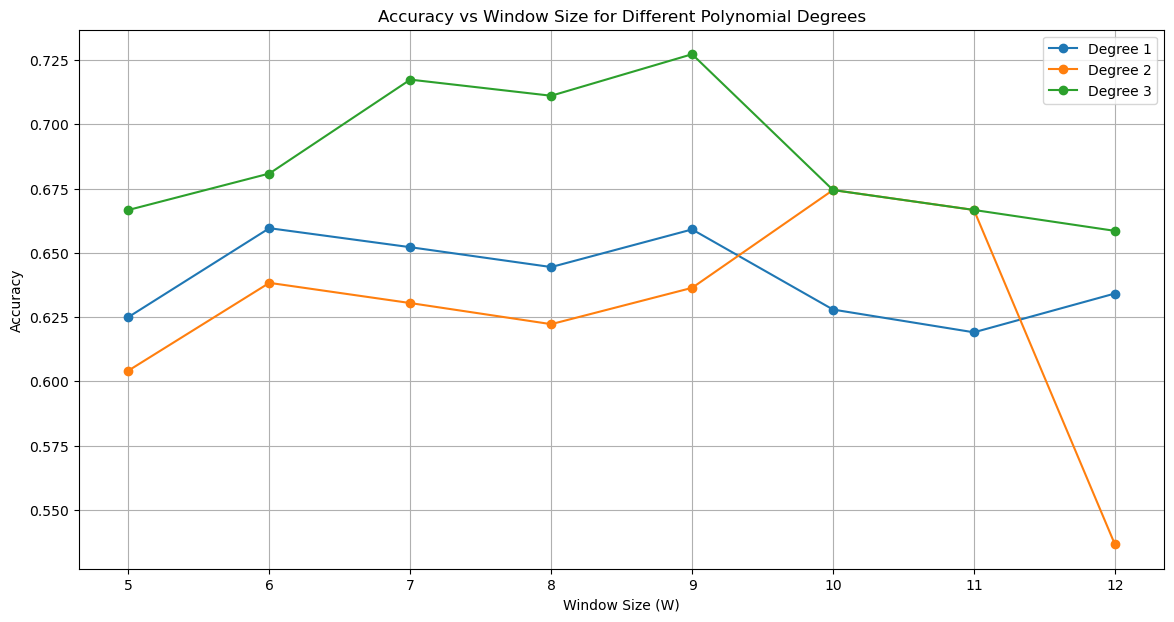

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for degree, results in accuracy_results.items():
    window_sizes = [result[0] for result in results] # w size and accuracy 
    accuracies = [result[1] for result in results]
    plt.plot(window_sizes, accuracies, marker='o', label=f'Degree {degree}')

plt.title('Accuracy vs Window Size for Different Polynomial Degrees')
plt.xlabel('Window Size (W)')
plt.ylabel('Accuracy')
plt.xticks(range(5, 13)) # window sizes 
plt.legend()
plt.grid(True)
plt.show()

In [145]:
#2 
start_date_year2 = end_date
end_date_year2 = start_date_year2 + pd.DateOffset(years=1)

data_year2 = data[(data['Date'] >= start_date_year2) & (data['Date'] < end_date_year2)]
data_year2.set_index('Date', inplace=True)
weekly_data_year_2 = data_year2['Adj Close'].resample('W').last().dropna()

best_window_sizes = {degree: max(results, key=lambda x: x[1])[0] for degree, results in accuracy_results.items()}
accuracy_results_year2 = {} # accuracy for year 2 

for degree, window_size in best_window_sizes.items():
    X_year1, y_year1 = prepare_data_for_poly1(weekly_data_year_1, window_size)
    X_year2, y_year2 = prepare_data_for_poly1(weekly_data_year_2, window_size)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_year1, y_year1)
    predicted_prices_year2 = model.predict(X_year2) # predicts labels for year 2 
    predicted_labels_year2 = ['green' if pred > weekly_data_year_2.iloc[i + window_size - 1] else 'red' 
                              for i, pred in enumerate(predicted_prices_year2)]
    actual_labels_year2 = ['green' if weekly_data_year_2.iloc[i + window_size] > weekly_data_year_2.iloc[i + window_size - 1] else 'red' # real labels 
                           for i in range(len(weekly_data_year_2) - window_size)]
    
    accuracy_year2 = accuracy_score(actual_labels_year2, predicted_labels_year2) # accuracy for year 2 
    accuracy_results_year2[degree] = accuracy_year2
best_window_sizes, accuracy_results_year2

({1: 6, 2: 10, 3: 9},
 {1: 0.6170212765957447, 2: 0.5348837209302325, 3: 0.6363636363636364})

In [146]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

confusion_matrices_year2 = {} # transform data for both years 
transformed_year1_data = {}
transformed_year2_data = {}
models = {}
accuracy_scores_year2 = {}

for degree, window_size in best_window_sizes.items(): # processed data for each degree 
    poly_features = PolynomialFeatures(degree)
    X_year1, y_year1 = prepare_data_for_poly1(weekly_data_year_1, window_size)
    X_year2, y_year2 = prepare_data_for_poly1(weekly_data_year_2, window_size)
    X_year1_transformed = poly_features.fit_transform(X_year1)
    transformed_year1_data[degree] = X_year1_transformed
    X_year2_transformed = poly_features.transform(X_year2)
    transformed_year2_data[degree] = X_year2_transformed
    model = LinearRegression() # uses polynomial model 
    model.fit(X_year1_transformed, y_year1)
    models[degree] = model
    
    predicted_prices_year2 = model.predict(X_year2_transformed)
    predicted_labels_year2 = ['green' if pred > weekly_data_year_2.iloc[i + window_size - 1] else 'red' 
                              for i, pred in enumerate(predicted_prices_year2)]
    actual_labels_year2 = ['green' if weekly_data_year_2.iloc[i + window_size] > weekly_data_year_2.iloc[i + window_size - 1] else 'red' 
                           for i in range(len(weekly_data_year_2) - window_size)]
    matrix = confusion_matrix(actual_labels_year2, predicted_labels_year2, labels=["green", "red"])
    confusion_matrices_year2[degree] = matrix
confusion_matrices_year2

{1: array([[17, 12],
        [ 6, 12]]),
 2: array([[14, 12],
        [ 8,  9]]),
 3: array([[17, 10],
        [ 6, 11]])}

In [147]:
#4
trading_strategies_results_year2 = {}
for degree, window_size in best_window_sizes.items():
    X_year2, y_year2 = prepare_data_for_poly1(weekly_data_year_2, window_size) # data year 2 
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_year2, y_year2)
    predicted_prices_year2 = model.predict(X_year2) # predict labels for year 2 
    predicted_labels_year2 = ['green' if pred > actual else 'red' for pred, actual in zip(predicted_prices_year2, weekly_data_year_2.iloc[window_size:])]
    starting_cash = 10000  # initializes
    cash = starting_cash
    shares_owned = 0  # shares 
    
    for i in range(len(predicted_labels_year2)):
        if predicted_labels_year2[i] == 'green': # buy if green
            if cash > 0: 
                buy_price = weekly_data_year_2.iloc[i + window_size - 1]
                shares_bought = cash / buy_price
                shares_owned += shares_bought
                cash -= shares_bought * buy_price

        sell_price = weekly_data_year_2.iloc[i + window_size] 
        cash += shares_owned * sell_price
        shares_owned = 0
    final_value = cash
    profit = final_value - starting_cash
    trading_strategies_results_year2[degree] = {'Final Value': final_value,'Profit': profit,'Return': profit / starting_cash * 100}
trading_strategies_results_year2

{1: {'Final Value': 7462.364539475869,
  'Profit': -2537.6354605241313,
  'Return': -25.376354605241314},
 2: {'Final Value': 8277.93781190045,
  'Profit': -1722.0621880995495,
  'Return': -17.220621880995495},
 3: {'Final Value': 7260.03214465706,
  'Profit': -2739.9678553429403,
  'Return': -27.399678553429403}}

In [148]:
# F test
from scipy.stats import f as fisher_f
#1 

def perform_f(data_month): # f test for a month 
    n = len(data_month)
    x = np.arange(n).reshape(-1, 1) # day as a predictor 
    y = data_month['Adj Close'].values
    model = LinearRegression().fit(x, y)
    predictions = model.predict(x)
    residuals = y - predictions
    SSE_full = np.sum(residuals**2)

    best_split = None # tracks the best split 
    min_SSE_split = float('inf')

    for k in range(1, n - 1):
        x1, y1 = x[:k], y[:k] # splits dataset 
        x2, y2 = x[k:], y[k:]
        model1 = LinearRegression().fit(x1, y1)
        model2 = LinearRegression().fit(x2, y2)
        predictions1 = model1.predict(x1)
        predictions2 = model2.predict(x2)
        residuals1 = y1 - predictions1
        residuals2 = y2 - predictions2
        SSE_split = np.sum(residuals1**2) + np.sum(residuals2**2)
        
        if SSE_split < min_SSE_split:
            min_SSE_split = SSE_split
            best_split = k

    numerator = (SSE_full - min_SSE_split) / 2  # calculates F 
    denominator = min_SSE_split / (n - 4)
    F_statistic = numerator / denominator
    p_value = 1 - fisher_f.cdf(F_statistic, 2, n - 4) # calculates P 
    is_significant = p_value < 0.1 # checks if value is significant 

    return best_split, F_statistic, p_value, is_significant

results = []

for year in [1, 2]:
    year_data = data[data['Year'] == data['Year'].min() + (year - 1)]
    for month in range(1, 13):
        data_month = year_data[year_data['Date'].dt.month == month]
        if not data_month.empty:
            best_split, F_statistic, p_value, is_significant = perform_f(data_month)
            results.append({'year': year_data['Year'].min(),'month': month,'best_split': best_split,'F_statistic': F_statistic,'p_value': p_value,'is_significant': is_significant})

results_df = pd.DataFrame(results)
results_df

,year,month,best_split,F_statistic,p_value,is_significant
0,2017,1,10,12.112214,6.266727e-04,True
1,2017,2,12,8.532897,3.352504e-03,True
2,2017,3,4,23.933840,6.435833e-06,True
3,2017,4,15,24.032476,2.100264e-05,True
4,2017,5,14,13.178367,2.984122e-04,True
5,2017,6,12,12.569651,3.833492e-04,True
6,2017,7,13,9.686725,1.752025e-03,True
7,2017,8,5,2.948318,7.670485e-02,True
8,2017,9,11,34.393502,1.608146e-06,True
9,2017,10,20,8.090306,3.114827e-03,True


In [149]:
# 2 and 3 

significant_changes_by_year = results_df.groupby('year')['is_significant'].sum() # changes during the year 

total_significant_changes = significant_changes_by_year.sum() # months with changes 
more_changes_year = significant_changes_by_year.idxmax() # checks which year had more changes 
significant_changes_by_year, total_significant_changes, more_changes_year

(year
 2017    12
 2018    12
 Name: is_significant, dtype: int64,
 24,
 2017)